In [1]:
import sys
print(sys.executable)

E:\ProgramData\Anaconda3\python.exe


In [2]:
!python -V
!pip -V

Python 3.8.3
pip 20.1.1 from E:\ProgramData\Anaconda3\lib\site-packages\pip (python 3.8)



## 数据采集

In [3]:
import requests
import pandas as pd
from lxml import etree

In [4]:
html = 'https://3g.dxy.cn/newh5/view/pneumonia'
html_data = requests.get(html)
html_data.encoding = 'utf-8'
html_data = etree.HTML(html_data.text,etree.HTMLParser())
html_data = html_data.xpath(
    '//*[@id="getListByCountryTypeService2true"]/text()'
)

# 集合
ncov_world = html_data[0][49:-12]
ncov_world = ncov_world.replace('true','True')
ncov_world = ncov_world.replace('false','False')
ncov_world = eval(ncov_world)
ncov_world

({'id': 5897690,
  'createTime': 1603600653000,
  'modifyTime': 1603600653000,
  'tags': '',
  'countryType': 2,
  'continents': '北美洲',
  'provinceId': '8',
  'provinceName': '美国',
  'provinceShortName': '',
  'cityName': '',
  'currentConfirmedCount': 4940516,
  'confirmedCount': 8571943,
  'confirmedCountRank': 1,
  'suspectedCount': 0,
  'curedCount': 3406656,
  'deadCount': 224771,
  'deadCountRank': 1,
  'deadRate': '2.62',
  'deadRateRank': 59,
  'comment': '',
  'sort': 0,
  'operator': 'panjiawei',
  'locationId': 971002,
  'countryShortCode': 'USA',
  'countryFullName': 'United States of America',
  'statisticsData': 'https://file1.dxycdn.com/2020/0315/553/3402160512808052518-135.json',
  'incrVo': {'currentConfirmedIncr': 45897,
   'confirmedIncr': 77899,
   'curedIncr': 31229,
   'deadIncr': 773},
  'showRank': True},
 {'id': 5897687,
  'createTime': 1603600653000,
  'modifyTime': 1603600653000,
  'tags': '',
  'countryType': 2,
  'continents': '欧洲',
  'provinceId': '5',
  '

In [5]:
country = []
confirmed = []
lived =[]
dead =[]

In [6]:
# 分离国家名称，确诊人数、治愈人书和死亡人数并存入dataframe
for i in ncov_world:
    country.append(i['provinceName'])
    confirmed.append(i['confirmedCount'])
    lived.append(i['curedCount'])
    dead.append(i['deadCount'])
    
data_world = pd.DataFrame()
data_world['国家名称'] = country
data_world['确诊人数'] = confirmed
data_world['治愈人数'] = lived
data_world['死亡人数'] = dead
data_world.head()

,国家名称,确诊人数,治愈人数,死亡人数
0,美国,8571943,3406656,224771
1,法国,1086497,109486,34645
2,西班牙,1046132,150376,34752
3,英国,830998,539,44571
4,印度,7814682,7016046,117956


In [7]:
data_world

,国家名称,确诊人数,治愈人数,死亡人数
0,美国,8571943,3406656,224771
1,法国,1086497,109486,34645
2,西班牙,1046132,150376,34752
3,英国,830998,539,44571
4,印度,7814682,7016046,117956
...,...,...,...,...
210,圣皮埃尔和密克隆群岛,16,0,0
211,福克兰群岛,13,0,0
212,蒙特塞拉特,13,0,1
213,安圭拉,3,0,0


### GDP数据分分析

- pandas.date_range()详解

| 参数 | 数据类型 | 意义 |
| ---- | ---- | ---- |
|start	|str or datetime-like, optional	|生成日期的左侧边界|
|end	|str or datetime-like, optional	|生成日期的右侧边界|
|periods	|integer, optional	|生成周期|
|freq	|str or DateOffset, default ‘D’	|可以有多种比如‘5H’，频率别名参见链接|
|tz	|str or tzinfo, optional	|返回本地化的DatetimeIndex的时区名，例如’Asia/Hong_Kong’|
|normalize	|bool, default False	|生成日期之前，将开始/结束时间初始化为午夜|
|name	|str, default None	|产生的DatetimeIndex的名字|
|closed	|{None, ‘left’, ‘right’}, optional	|使区间相对于给定频率左闭合、右闭合、双向闭合（默认的None）|
|**kwargs	| 	 为了兼容性，对结果没有影响 |

In [8]:
data_economy = pd.read_csv("./dataset/gpd_2016_2020.csv",index_col=0)
time_index = pd.date_range(start='2016',periods=18,freq='Q')
data_economy.index = time_index
data_economy

,国内生产总值,第一产业增加值,第二产业增加值,第三产业增加值,农林牧渔业增加值,工业增加值,制造业增加值,建筑业增加值,批发和零售业增加值,交通运输、仓储和邮政业增加值,住宿和餐饮业增加值,金融业增加值,房地产业增加值,信息传输、软件和信息技术服务业增加值,租赁和商务服务业增加值,其他行业增加值
2016-03-31,162410.0,8312.7,61106.8,92990.5,8665.5,53666.4,45784.0,7763.0,16847.5,7180.5,3181.6,15340.4,11283.0,5128.8,4985.3,28368.1
2016-06-30,181408.2,12555.9,73416.5,95435.8,13045.5,60839.2,52378.3,12943.8,17679.8,8295.0,3112.3,14811.7,12209.7,5130.7,5075.1,28265.4
2016-09-30,191010.6,17542.4,75400.5,98067.8,18162.2,61902.5,52468.3,13870.6,18513.0,8591.6,3473.2,14945.4,12615.3,4662.3,5452.4,28822.1
2016-12-31,211566.2,21728.2,85504.1,104334.0,22577.8,68998.4,58878.4,16921.5,20684.1,8961.6,3840.7,14866.4,13861.4,5202.3,6015.8,29636.1
2017-03-31,181867.7,8205.9,69315.5,104346.3,8595.8,60909.3,51419.7,8725.3,18608.9,8094.5,3536.5,16758.8,13047.0,5915.2,5811.9,31864.3
2017-06-30,201950.3,12644.9,82323.0,106982.4,13204.2,68099.8,58172.1,14574.4,19473.6,9397.7,3440.9,15856.3,14059.0,5977.9,5868.4,31998.1
2017-09-30,212789.3,18255.8,84574.1,109959.5,18944.2,69327.2,58632.6,15590.1,20342.9,9688.7,3838.5,16290.4,14054.9,5539.8,6464.6,32708.0
2017-12-31,235428.7,22992.9,95368.0,117067.8,23915.8,76782.9,65652.1,19015.8,22731.1,9940.9,4240.1,15938.8,15925.1,6376.0,7128.4,33433.7
2018-03-31,202035.7,8575.7,76598.2,116861.8,9005.8,66905.6,56631.9,10073.8,20485.5,8806.5,3887.8,18050.6,14863.5,7212.2,6879.5,35864.9
2018-06-30,223962.2,13003.8,91100.6,119857.8,13662.2,75122.1,64294.9,16404.3,21374.2,10174.9,3779.6,17401.0,16176.1,7309.6,6885.3,35673.1


In [9]:
data_area = pd.read_csv('./dataset/DXYArea.csv')
data_area.head()
data_news = pd.read_csv('./dataset/DXYNews.csv')
data_news.head()

,_id,id,pubDate,title,summary,infoSource,sourceUrl,provinceId,crawlTime,entryWay,infoType,dataInfoState,dataInfoOperator,dataInfoTime,provinceName,createTime,modifyTime,adoptType,body
0,5f10e2359a94f2b3c3837ccf,65725,2020-07-17 05:40:08,美国新增71434例新冠肺炎确诊病例，累计确诊超354万例,据美国约翰斯·霍普金斯大学统计数据显示，截至美东时间7月16日17:33时（北京时间17日0...,央视新闻app,http://app.cctv.com/special/cportal/detail/art...,NaN,2020-07-17 07:26:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5f10e1409a94f2b3c3837cce,65728,2020-07-17 06:06:49,巴西新冠肺炎确诊病例破201万，近六成大城市确诊病例加速增长,截至当地时间7月16日18时，巴西新增新冠肺炎确诊病例45403例，累计确诊2012151例...,央视新闻app,http://app.cctv.com/special/cportal/detail/art...,NaN,2020-07-17 07:22:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5f1070fd9a94f2b3c3837c7a,65679,2020-07-16 22:31:00,阿塞拜疆新增493例新冠肺炎确诊病例 累计确诊26165例,当地时间7月16日，阿塞拜疆国家疫情防控指挥部发布消息，在过去24小时内，阿塞拜疆新增新冠肺...,央视新闻app,http://app.cctv.com/special/cportal/detail/art...,NaN,2020-07-16 23:23:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5f1070fd9a94f2b3c3837c7b,65681,2020-07-16 22:29:48,​科威特新增791例新冠肺炎确诊病例 累计确诊57668例,科威特卫生部当地时间16日下午发布通告，确认过去24小时境内新增791例新冠肺炎确诊病例，同...,央视新闻app,http://app.cctv.com/special/cportal/detail/art...,NaN,2020-07-16 23:23:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5f1058ae9a94f2b3c3837c79,65663,2020-07-16 21:26:54,罗马尼亚新增777例新冠肺炎确诊病例 累计确诊35003例,据罗马尼亚政府7月16日公布的数据，过去24小时对19097人进行新冠病毒检测，确诊777例...,央视新闻app,http://app.cctv.com/special/cportal/detail/art...,NaN,2020-07-16 21:39:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 数据预处理

In [10]:
data_area = data_area[data_area['countryName'] == data_area['provinceName']]
data_area_times = data_area[['countryName','province_confirmedCount',
                             'province_curedCount','province_deadCount','updateTime']]

# 根据疫情更新时间来生成时间序列
time = pd.DatetimeIndex(data_area_times['updateTime'])
# 生成索引
data_area_times.index = time
data_area_times = data_area_times.drop('updateTime',axis=1)
data_area_times.head()

# 查询是否有空值
data_area_times.isnull().sum()
data_area_times.isnull().any()

countryName                False
province_confirmedCount    False
province_curedCount        False
province_deadCount         False
dtype: bool

In [11]:
data_news_times = data_news[['pubDate','title','summary']]
time = pd.DatetimeIndex(data_news_times['pubDate'])
data_news_times.index = time
data_news_times = data_news_times.drop('pubDate',axis = 1)
data_news_times.head()

,title,summary
pubDate,,
2020-07-17 05:40:08,美国新增71434例新冠肺炎确诊病例，累计确诊超354万例,据美国约翰斯·霍普金斯大学统计数据显示，截至美东时间7月16日17:33时（北京时间17日0...
2020-07-17 06:06:49,巴西新冠肺炎确诊病例破201万，近六成大城市确诊病例加速增长,截至当地时间7月16日18时，巴西新增新冠肺炎确诊病例45403例，累计确诊2012151例...
2020-07-16 22:31:00,阿塞拜疆新增493例新冠肺炎确诊病例 累计确诊26165例,当地时间7月16日，阿塞拜疆国家疫情防控指挥部发布消息，在过去24小时内，阿塞拜疆新增新冠肺...
2020-07-16 22:29:48,​科威特新增791例新冠肺炎确诊病例 累计确诊57668例,科威特卫生部当地时间16日下午发布通告，确认过去24小时境内新增791例新冠肺炎确诊病例，同...
2020-07-16 21:26:54,罗马尼亚新增777例新冠肺炎确诊病例 累计确诊35003例,据罗马尼亚政府7月16日公布的数据，过去24小时对19097人进行新冠病毒检测，确诊777例...


In [12]:
print(data_economy.isnull().sum())
print(data_world.isnull().sum())
print(data_area_times.isnull().sum())
print(data_news_times.isnull().sum())

国内生产总值                0
第一产业增加值               0
第二产业增加值               0
第三产业增加值               0
农林牧渔业增加值              0
工业增加值                 0
制造业增加值                0
建筑业增加值                0
批发和零售业增加值             0
交通运输、仓储和邮政业增加值        0
住宿和餐饮业增加值             0
金融业增加值                0
房地产业增加值               0
信息传输、软件和信息技术服务业增加值    0
租赁和商务服务业增加值           0
其他行业增加值               0
dtype: int64
国家名称    0
确诊人数    0
治愈人数    0
死亡人数    0
dtype: int64
countryName                0
province_confirmedCount    0
province_curedCount        0
province_deadCount         0
dtype: int64
title      0
summary    0
dtype: int64


### 疫情现状数据分析

In [13]:
# 下载开源字体思源黑体
!wget -nc "https://labfile.oss.aliyuncs.com/courses/2791/NotoSansCJK.otf"

'wget' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [14]:
import matplotlib.pyplot as plt
import matplotlib
import os
%matplotlib inline

##### sort_values()
- by	指定列名(axis=0或’index’)或索引值(axis=1或’columns’)
- axis	若axis=0或’index’，则按照指定列中数据大小排序；若axis=1或’columns’，则按照指定索引中数据大小排序，默认axis=0
- ascending	是否按指定列的数组升序排列，默认为True，即升序排列
- inplace	是否用排序后的数据集替换原来的数据，默认为False，即不替换
- na_position	{‘first’,‘last’}，设定缺失值的显示位置

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 30830 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 35786 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 27835 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 24840 missing from c

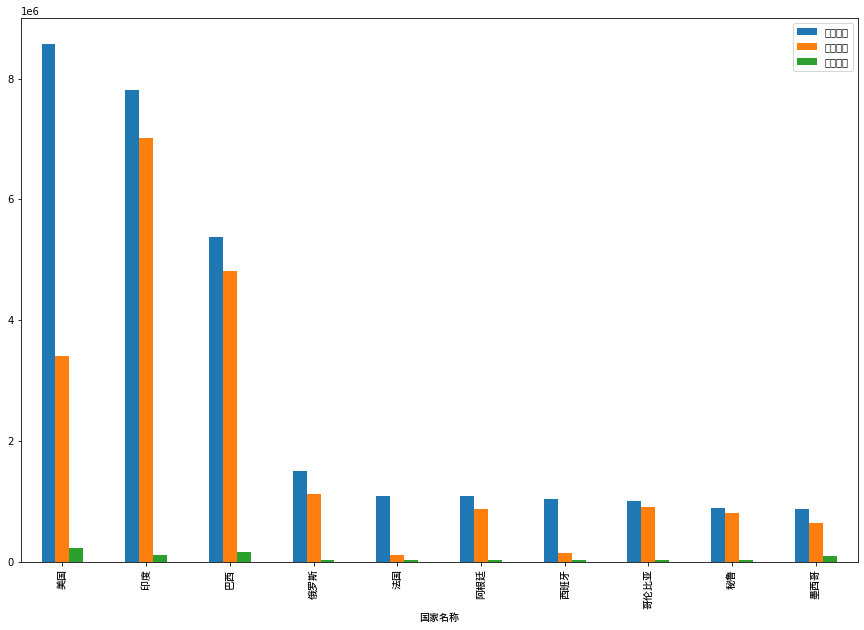

In [15]:
# 设置字体
font_path = "./NotoSansCJK.otf"
myfont = matplotlib.font_manager.FontProperties(fname=font_path)

# 绘图
# 按确诊人数进行排序
data_world = data_world.sort_values(by='确诊人数' ,ascending=False)
data_world_set = data_world[['确诊人数','治愈人数','死亡人数']]
data_world_set.index = data_world['国家名称']
data_world_set.head(10).plot(kind='bar',figsize=(15,10))
plt.xlabel('国家名称',fontproperties = myfont)
plt.xticks(fontproperties = myfont)

In [18]:
!pip install pyecharts==1.7.1 -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Created wheel for simplejson: filename=simplejson-3.17.2-cp38-cp38-win_amd64.whl size=74427 sha256=f6bec08e49d280d3bb29c74c63389ddaaf25af37c5de7ef7954194e7aa6a53bd
  Stored in directory: c:\users\ysilhouette\appdata\local\pip\cache\wheels\b6\9e\7b\d770b86ff004cdd6ed225b05b798a1e288f3993a7c5b6e2a81
Successfully built simplejson


In [19]:
from pyecharts.charts import Map
from pyecharts import options as opts
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB


name_map = {  # 世界各国数据的中英文对比
    'Singapore Rep.': '新加坡',
    'Dominican Rep.': '多米尼加',
    'Palestine': '巴勒斯坦',
    'Bahamas': '巴哈马',
    'Timor-Leste': '东帝汶',
    'Afghanistan': '阿富汗',
    'Guinea-Bissau': '几内亚比绍',
    "Côte d'Ivoire": '科特迪瓦',
    'Siachen Glacier': '锡亚琴冰川',
    "Br. Indian Ocean Ter.": '英属印度洋领土',
    'Angola': '安哥拉',
    'Albania': '阿尔巴尼亚',
    'United Arab Emirates': '阿联酋',
    'Argentina': '阿根廷',
    'Armenia': '亚美尼亚',
    'French Southern and Antarctic Lands': '法属南半球和南极领地',
    'Australia': '澳大利亚',
    'Austria': '奥地利',
    'Azerbaijan': '阿塞拜疆',
    'Burundi': '布隆迪',
    'Belgium': '比利时',
    'Benin': '贝宁',
    'Burkina Faso': '布基纳法索',
    'Bangladesh': '孟加拉国',
    'Bulgaria': '保加利亚',
    'The Bahamas': '巴哈马',
    'Bosnia and Herz.': '波斯尼亚和黑塞哥维那',
    'Belarus': '白俄罗斯',
    'Belize': '伯利兹',
    'Bermuda': '百慕大',
    'Bolivia': '玻利维亚',
    'Brazil': '巴西',
    'Brunei': '文莱',
    'Bhutan': '不丹',
    'Botswana': '博茨瓦纳',
    'Central African Rep.': '中非',
    'Canada': '加拿大',
    'Switzerland': '瑞士',
    'Chile': '智利',
    'China': '中国',
    'Ivory Coast': '象牙海岸',
    'Cameroon': '喀麦隆',
    'Dem. Rep. Congo': '刚果民主共和国',
    'Congo': '刚果',
    'Colombia': '哥伦比亚',
    'Costa Rica': '哥斯达黎加',
    'Cuba': '古巴',
    'N. Cyprus': '北塞浦路斯',
    'Cyprus': '塞浦路斯',
    'Czech Rep.': '捷克',
    'Germany': '德国',
    'Djibouti': '吉布提',
    'Denmark': '丹麦',
    'Algeria': '阿尔及利亚',
    'Ecuador': '厄瓜多尔',
    'Egypt': '埃及',
    'Eritrea': '厄立特里亚',
    'Spain': '西班牙',
    'Estonia': '爱沙尼亚',
    'Ethiopia': '埃塞俄比亚',
    'Finland': '芬兰',
    'Fiji': '斐',
    'Falkland Islands': '福克兰群岛',
    'France': '法国',
    'Gabon': '加蓬',
    'United Kingdom': '英国',
    'Georgia': '格鲁吉亚',
    'Ghana': '加纳',
    'Guinea': '几内亚',
    'Gambia': '冈比亚',
    'Guinea Bissau': '几内亚比绍',
    'Eq. Guinea': '赤道几内亚',
    'Greece': '希腊',
    'Greenland': '格陵兰',
    'Guatemala': '危地马拉',
    'French Guiana': '法属圭亚那',
    'Guyana': '圭亚那',
    'Honduras': '洪都拉斯',
    'Croatia': '克罗地亚',
    'Haiti': '海地',
    'Hungary': '匈牙利',
    'Indonesia': '印度尼西亚',
    'India': '印度',
    'Ireland': '爱尔兰',
    'Iran': '伊朗',
    'Iraq': '伊拉克',
    'Iceland': '冰岛',
    'Israel': '以色列',
    'Italy': '意大利',
    'Jamaica': '牙买加',
    'Jordan': '约旦',
    'Japan': '日本',
    'Kazakhstan': '哈萨克斯坦',
    'Kenya': '肯尼亚',
    'Kyrgyzstan': '吉尔吉斯斯坦',
    'Cambodia': '柬埔寨',
    'Korea': '韩国',
    'Kosovo': '科索沃',
    'Kuwait': '科威特',
    'Lao PDR': '老挝',
    'Lebanon': '黎巴嫩',
    'Liberia': '利比里亚',
    'Libya': '利比亚',
    'Sri Lanka': '斯里兰卡',
    'Lesotho': '莱索托',
    'Lithuania': '立陶宛',
    'Luxembourg': '卢森堡',
    'Latvia': '拉脱维亚',
    'Morocco': '摩洛哥',
    'Moldova': '摩尔多瓦',
    'Madagascar': '马达加斯加',
    'Mexico': '墨西哥',
    'Macedonia': '马其顿',
    'Mali': '马里',
    'Myanmar': '缅甸',
    'Montenegro': '黑山',
    'Mongolia': '蒙古',
    'Mozambique': '莫桑比克',
    'Mauritania': '毛里塔尼亚',
    'Malawi': '马拉维',
    'Malaysia': '马来西亚',
    'Namibia': '纳米比亚',
    'New Caledonia': '新喀里多尼亚',
    'Niger': '尼日尔',
    'Nigeria': '尼日利亚',
    'Nicaragua': '尼加拉瓜',
    'Netherlands': '荷兰',
    'Norway': '挪威',
    'Nepal': '尼泊尔',
    'New Zealand': '新西兰',
    'Oman': '阿曼',
    'Pakistan': '巴基斯坦',
    'Panama': '巴拿马',
    'Peru': '秘鲁',
    'Philippines': '菲律宾',
    'Papua New Guinea': '巴布亚新几内亚',
    'Poland': '波兰',
    'Puerto Rico': '波多黎各',
    'Dem. Rep. Korea': '朝鲜',
    'Portugal': '葡萄牙',
    'Paraguay': '巴拉圭',
    'Qatar': '卡塔尔',
    'Romania': '罗马尼亚',
    'Russia': '俄罗斯',
    'Rwanda': '卢旺达',
    'W. Sahara': '西撒哈拉',
    'Saudi Arabia': '沙特阿拉伯',
    'Sudan': '苏丹',
    'S. Sudan': '南苏丹',
    'Senegal': '塞内加尔',
    'Solomon Is.': '所罗门群岛',
    'Sierra Leone': '塞拉利昂',
    'El Salvador': '萨尔瓦多',
    'Somaliland': '索马里兰',
    'Somalia': '索马里',
    'Serbia': '塞尔维亚',
    'Suriname': '苏里南',
    'Slovakia': '斯洛伐克',
    'Slovenia': '斯洛文尼亚',
    'Sweden': '瑞典',
    'Swaziland': '斯威士兰',
    'Syria': '叙利亚',
    'Chad': '乍得',
    'Togo': '多哥',
    'Thailand': '泰国',
    'Tajikistan': '塔吉克斯坦',
    'Turkmenistan': '土库曼斯坦',
    'East Timor': '东帝汶',
    'Trinidad and Tobago': '特里尼达和多巴哥',
    'Tunisia': '突尼斯',
    'Turkey': '土耳其',
    'Tanzania': '坦桑尼亚',
    'Uganda': '乌干达',
    'Ukraine': '乌克兰',
    'Uruguay': '乌拉圭',
    'United States': '美国',
    'Uzbekistan': '乌兹别克斯坦',
    'Venezuela': '委内瑞拉',
    'Vietnam': '越南',
    'Vanuatu': '瓦努阿图',
    'West Bank': '西岸',
    'Yemen': '也门',
    'South Africa': '南非',
    'Zambia': '赞比亚',
    'Zimbabwe': '津巴布韦',
    'Comoros': '科摩罗'
}

map = Map(init_opts=opts.InitOpts(
            width="1900px", 
            height="900px",
            bg_color="#ADD8E6", 
            page_title="全球疫情确诊人数"))  # 获得世界地图数据
map.add("确诊人数", 
        [list(z) for z in zip(data_world['国家名称'], 
                              data_world['确诊人数'])
        ],
        is_map_symbol_show=False,  # 添加确诊人数信息
        # 通过name_map来转化国家的中英文名称方便显示
        maptype="world", 
        label_opts=opts.LabelOpts(is_show=False), 
        name_map=name_map,
        itemstyle_opts=opts.ItemStyleOpts(color="rgb(49,60,72)"),
        ).set_global_opts(
            visualmap_opts=opts.VisualMapOpts(max_=1000000),  # 对视觉映射进行配置
        )
map.load_javascript()

In [20]:
map.render_notebook()

#### 疫情增长数据分析

In [21]:
country = data_area_times.sort_values('province_confirmedCount', ascending=False).drop_duplicates(subset='countryName',keep='first').head(6)['countryName']

In [22]:
country = list(country)
country

['美国', '巴西', '印度', '俄罗斯', '秘鲁', '智利']

In [23]:
data_America = data_area_times[data_area_times['countryName'] == '美国']
data_Brazil = data_area_times[data_area_times['countryName'] == '巴西']
data_India = data_area_times[data_area_times['countryName'] == '印度']
data_Russia = data_area_times[data_area_times['countryName'] == '俄罗斯']
data_Peru = data_area_times[data_area_times['countryName'] == '秘鲁']
data_Chile = data_area_times[data_area_times['countryName'] == '智利']

timeindex = data_area_times.index
timeindex = timeindex.floor('D')
data_area_times.index = timeindex
data_area_times.index

DatetimeIndex(['2020-07-16', '2020-07-16', '2020-07-16', '2020-07-16',
               '2020-07-16', '2020-07-16', '2020-07-16', '2020-07-16',
               '2020-07-16', '2020-07-16',
               ...
               '2020-01-27', '2020-01-27', '2020-01-27', '2020-01-27',
               '2020-01-27', '2020-01-27', '2020-01-27', '2020-01-27',
               '2020-01-27', '2020-01-27'],
              dtype='datetime64[ns]', name='updateTime', length=140788, freq=None)

In [24]:
timeseries = pd.DataFrame(data_America.index)
timeseries.index =  data_America.index
timeseries
data_America = pd.concat([timeseries,data_America],axis=1)
data_America

,updateTime,countryName,province_confirmedCount,province_curedCount,province_deadCount
updateTime,,,,,
2020-07-16 23:50:17,2020-07-16 23:50:17,美国,3499771,1075882,137420
2020-07-16 18:51:50,2020-07-16 18:51:50,美国,3499398,1075882,137419
2020-07-16 17:59:29,2020-07-16 17:59:29,美国,3499398,1075882,137419
2020-07-16 14:33:58,2020-07-16 14:33:58,美国,3495537,1075882,137358
2020-07-16 11:25:05,2020-07-16 11:25:05,美国,3495537,1075882,137358
...,...,...,...,...,...
2020-02-03 09:28:34,2020-02-03 09:28:34,美国,9,0,0
2020-02-02 07:41:43,2020-02-02 07:41:43,美国,8,0,0
2020-02-01 02:48:13,2020-02-01 02:48:13,美国,6,0,0


In [25]:
data_America.drop_duplicates(subset='updateTime',keep='first',inplace=True)

In [26]:
data_America.drop('updateTime',axis=1,inplace=True)

In [27]:
data_America

,countryName,province_confirmedCount,province_curedCount,province_deadCount
updateTime,,,,
2020-07-16 23:50:17,美国,3499771,1075882,137420
2020-07-16 18:51:50,美国,3499398,1075882,137419
2020-07-16 17:59:29,美国,3499398,1075882,137419
2020-07-16 14:33:58,美国,3495537,1075882,137358
2020-07-16 11:25:05,美国,3495537,1075882,137358
...,...,...,...,...
2020-02-03 09:28:34,美国,9,0,0
2020-02-02 07:41:43,美国,8,0,0
2020-02-01 02:48:13,美国,6,0,0


In [28]:
timeseries = pd.DataFrame(data_Brazil.index)
timeseries.index =  data_Brazil.index
timeseries
data_Brazil = pd.concat([timeseries,data_Brazil],axis=1)
data_Brazil.drop_duplicates(subset='updateTime',keep='first',inplace=True)
data_Brazil.drop('updateTime',axis=1,inplace=True)
data_Brazil

,countryName,province_confirmedCount,province_curedCount,province_deadCount
updateTime,,,,
2020-07-16 23:50:17,巴西,1966748,1255564,75366
2020-07-16 14:33:58,巴西,1966748,1213512,75366
2020-07-16 10:59:24,巴西,1966748,1213512,75366
2020-07-16 10:03:57,巴西,1966748,1213512,75366
2020-07-16 08:22:09,巴西,1966748,1213512,75366
...,...,...,...,...
2020-02-28 07:08:53,巴西,1,0,0
2020-02-27 19:56:59,巴西,1,0,0
2020-02-27 13:28:15,巴西,1,0,0


In [29]:
timeseries = pd.DataFrame(data_India.index)
timeseries.index =  data_India.index
timeseries
data_India = pd.concat([timeseries,data_India],axis=1)
data_India.drop_duplicates(subset='updateTime',keep='first',inplace=True)
data_India.drop('updateTime',axis=1,inplace=True)
data_India

,countryName,province_confirmedCount,province_curedCount,province_deadCount
updateTime,,,,
2020-07-16 23:50:17,印度,968876,612815,24915
2020-07-16 18:51:50,印度,968876,612815,24915
2020-07-16 14:33:58,印度,968876,612815,24915
2020-07-16 10:59:24,印度,936181,592032,24309
2020-07-16 10:03:57,印度,936181,592032,24309
...,...,...,...,...
2020-02-10 14:08:56,印度,3,0,0
2020-02-04 23:30:41,印度,3,0,0
2020-02-02 13:54:56,印度,2,0,0


In [30]:
timeseries = pd.DataFrame(data_Peru.index)
timeseries.index =  data_Peru.index
timeseries
data_Peru = pd.concat([timeseries,data_Peru],axis=1)
data_Peru.drop_duplicates(subset='updateTime',keep='first',inplace=True)
data_Peru.drop('updateTime',axis=1,inplace=True)
data_Peru

,countryName,province_confirmedCount,province_curedCount,province_deadCount
updateTime,,,,
2020-07-16 23:50:17,秘鲁,337724,242474,12417
2020-07-16 18:51:50,秘鲁,337724,242474,12417
2020-07-16 16:24:01,秘鲁,337724,242474,12417
2020-07-16 14:33:58,秘鲁,337724,242474,12417
2020-07-16 10:59:24,秘鲁,337724,242474,12417
...,...,...,...,...
2020-03-07 18:58:02,秘鲁,1,0,0
2020-03-07 17:32:01,秘鲁,1,0,0
2020-03-07 07:15:02,秘鲁,1,0,0


In [31]:
timeseries = pd.DataFrame(data_Russia.index)
timeseries.index =  data_Russia.index
timeseries
data_Russia = pd.concat([timeseries,data_Russia],axis=1)
data_Russia.drop_duplicates(subset='updateTime',keep='first',inplace=True)
data_Russia.drop('updateTime',axis=1,inplace=True)
data_Russia

,countryName,province_confirmedCount,province_curedCount,province_deadCount
updateTime,,,,
2020-07-16 23:50:17,俄罗斯,752797,531692,11937
2020-07-16 18:51:50,俄罗斯,752797,531692,11937
2020-07-16 16:24:01,俄罗斯,752797,531692,11937
2020-07-16 14:33:58,俄罗斯,746369,523249,11770
2020-07-16 10:59:24,俄罗斯,746369,523249,11770
...,...,...,...,...
2020-02-10 15:27:06,俄罗斯,2,0,0
2020-02-10 15:19:58,俄罗斯,2,0,0
2020-02-10 14:08:56,俄罗斯,2,0,0


In [32]:
timeseries = pd.DataFrame(data_Chile.index)
timeseries.index =  data_Chile.index
timeseries
data_Chile = pd.concat([timeseries,data_Chile],axis=1)
data_Chile.drop_duplicates(subset='updateTime',keep='first',inplace=True)
data_Chile.drop('updateTime',axis=1,inplace=True)
data_Chile

,countryName,province_confirmedCount,province_curedCount,province_deadCount
updateTime,,,,
2020-07-16 14:33:58,智利,321205,292085,7186
2020-07-16 10:59:24,智利,321205,292085,7186
2020-07-16 10:03:57,智利,321205,292085,7186
2020-07-16 08:22:09,智利,321205,292085,7186
2020-07-16 07:28:47,智利,321205,292085,7186
...,...,...,...,...
2020-03-05 07:14:02,智利,1,0,0
2020-03-04 21:50:02,智利,1,0,0
2020-03-04 17:24:13,智利,1,0,0


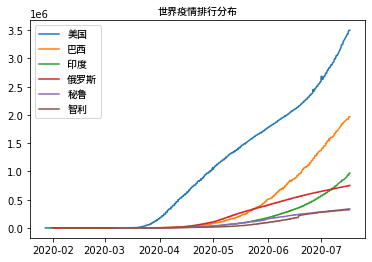

In [33]:
plt.title("世界疫情排行分布",fontproperties= myfont)
plt.plot(data_America['province_confirmedCount'])
plt.plot(data_Brazil['province_confirmedCount'])
plt.plot(data_India['province_confirmedCount'])
plt.plot(data_Russia['province_confirmedCount'])
plt.plot(data_Peru['province_confirmedCount'])
plt.plot(data_Chile['province_confirmedCount'])
plt.legend(country,prop=myfont)

### 新冠疫情新闻挖掘分析

#### sort
- sorted(d.items(), key=lambda x: x[1])   中 d.items() 为待排序的对象；
- key=lambda x: x[1] 为对前面的对象中的第二维数据（即value）的值进行排序。 
- key=lambda  变量：变量[维数] 。维数可以按照自己的需要进行设置。

In [39]:
!pip install wordcloud -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\YSILHO~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.483 seconds.
Prefix dict has been built successfully.


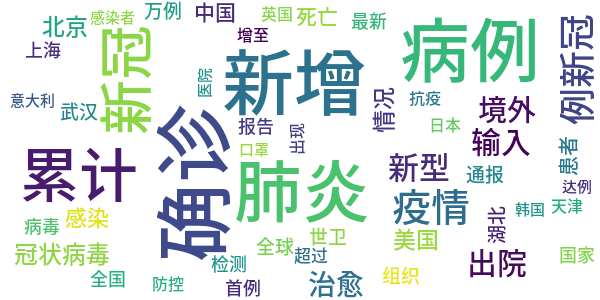

In [40]:
import jieba
import re
from wordcloud import WordCloud

def word_cnt(x):
    return jieba.lcut(x) # 进行jieba分词
news =[]
# 非中文 正则pattern
reg = "[^\u4e00-\u9fa5]"
for i in data_news['title']:
#     print(re.sub(reg,'',i))
    if re.sub(reg,'',i) != '':
        news.append(re.sub(reg,'',i))
words=[]
counts ={}
for i in news:
    words.append(word_cnt(i)) # 对所有新闻进行分词
for word in words:
    for a_word in word:
        if len(a_word) == 1:
            continue
        else:
            # 字典村塾对应分词的词频
            # counts[word] = counts.get(word,0)+1 是对进行计数word出现的频率进行统计，
            ### 当word不在words时，返回值是0，
            ### 当word在words中时，返回+1，以此进行累计计数
            counts[a_word] = counts.get(a_word,0)+1
# counts

words_sort = list(counts.items())
words_sort.sort(key=lambda x:x[1],reverse=True)
words_sort

newcloud = WordCloud(font_path='./NotoSansCJK.otf' , 
                     background_color="white" ,
                     width=600,
                     height=300,
                     max_words=50)
newcloud.generate_from_frequencies(counts)
image = newcloud.to_image()  # 转换成图片
image

### 针对疫情新闻的分词生成词向量，通过词向量可以对这些词进行 K-Means 聚类
- 可以获得不同新闻词汇之间的联系，对于新闻的相关性分析和推荐很有参考意义

In [41]:
!pip install gensim -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/11/9a/ba2d5f67f25e8d5bbf2fcec7a99b1e38428e83cb715f64dd179ca43a11bb/smart_open-3.0.0.tar.gz (113 kB)
  Created wheel for smart-open: filename=smart_open-3.0.0-py3-none-any.whl size=107102 sha256=fad1af9fe81d01b98c42ac3786d4813423d06527c35b35f34468372c56410e12
  Stored in directory: c:\users\ysilhouette\appdata\local\pip\cache\wheels\32\95\37\0790630b6ab8d0d0c7a34d406cc368159736c164789fe7dd8c
Successfully built smart-open
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


Text(0, 0.5, 'Distortion')

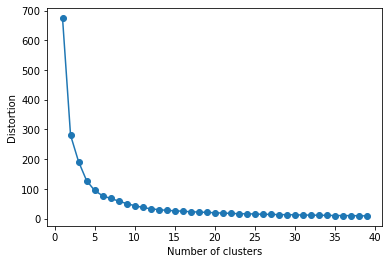

In [45]:
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

words = []
for i in news:
    words.append(word_cnt(i))
    
# 词向量进行训练
model = Word2Vec(words,sg=0,size=300,window=5,min_count=5)
keys = model.wv.vocab.keys()   # 获取词汇列表
wordvector = []

for key in keys:
    wordvector.append(model[key])
    
distortions = []
for i in range(1,40):
    # 分别聚为1-40类
    word_kmeans = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    
    word_kmeans.fit(wordvector)
    distortions.append(word_kmeans.inertia_)  # 算出样本距离最近的聚类中心的距离

plt.plot(range(1,40),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

- 聚类在 5 类之后应该较好，至 15 类之后下降就不再明显

In [47]:
word_kmeans = KMeans(n_clusters=10)
word_kmeans.fit(wordvector)

labels = word_kmeans.labels_
# 打印每个类的的信息
for num in range(0,10):
    text = []
    print('第'+str(num) +'次text')
    print(text)
    for i in range(len(keys)):
        if labels[i] == num:
            text.append(list(keys)[i])
    print('keys循环后的text')
    print(text)

第0次text
[]
keys循环后的text
['阿塞拜疆', '科威特', '塞内加尔', '白俄罗斯', '越南', '国际航班', '仪式', '引发', '好', '营业', '下跌', '乌克兰', '保加利亚', '乌兹别克斯坦', '回升', '阿根廷', '住院', '严峻', '葡萄牙', '证明', '例均', '工作人员', '疾病', '大厅', '希腊', '两个', '筛查', '工人', '冠', '北美', '危机', '重开', '新西兰', '减少', '洛杉矶', '加纳', '阿曼', '地方', '关键', '心理', '出席', '须', '帮助', '肯尼亚', '死于', '倍', '老人', '如何', '圭亚那', '巴基斯坦', '案例', '具备', '所', '给', '吉尔吉斯斯坦', '挑战', '数超', '序列', '捷克', '名单', '近万', '统计', '外卖', '预测', '卫健委月', '比', '印尼', '上海市', '正在', '考试', '智利', '比赛', '进京', '量', '详情', '多数', '纳入', '明显', '海滩', '圈', '经济衰退', '规模', '疾控', '办事处', '视频', '尚', '条', '建', '教育部', '罚款', '蛋白质', '布', '全', '全员', '型', '辽宁大连', '份', '沈阳', '水平', '变', '斯里兰卡', '纽约市', '处以', '停运', '生命', '也门', '通告', '参加', '就诊', '作用', '供应', '沙特', '不断', '突尼斯', '赞比亚', '接收', '系统', '以色列', '参与', '复航', '共计', '流动', '强调', '分批', '孟加拉国', '牡丹江', '亿只', '赤道几内亚', '金', '四川省', '近例', '乌拉圭', '尼日利亚', '次', '封闭式', '啦', '河北省', '航空公司', '马里', '苏丹', '亚洲', '阿尔及利亚', '胜利', '近万人', '武汉协和医院', '叙利亚', '卡塔尔', '伊拉克', '各', '白宫', '缅甸', '毛里求斯', '柳叶刀', '数量'

### 疫情对行业影响时序建模分析

<Figure size 432x288 with 0 Axes>

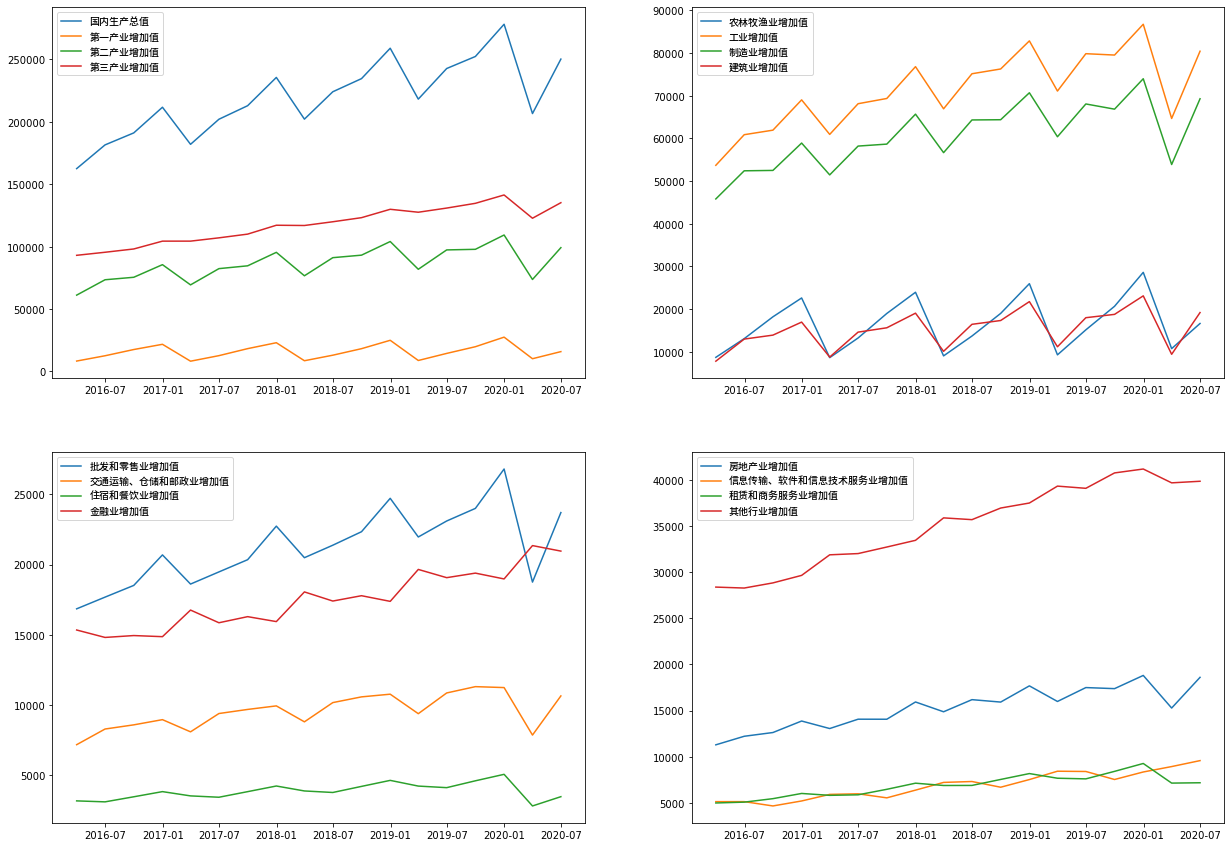

In [53]:
sum_GDP = ['国内生产总值', '第一产业增加值', '第二产业增加值', '第三产业增加值']
industry_GDP = ['农林牧渔业增加值', '工业增加值', '制造业增加值', '建筑业增加值']
industry2_GDP = ['批发和零售业增加值', '交通运输、仓储和邮政业增加值', '住宿和餐饮业增加值', '金融业增加值']
industry3_GDP = ['房地产业增加值', '信息传输、软件和信息技术服务业增加值',
                 '租赁和商务服务业增加值', '其他行业增加值']

fig = plt.figure()
fig,axes = plt.subplots(2,2,figsize=(21,15))
axes[0][0].plot(data_economy[sum_GDP])
axes[0][0].legend(sum_GDP,prop=myfont)

axes[0][1].plot(data_economy[industry_GDP])
axes[0][1].legend(industry_GDP,prop=myfont)

axes[1][0].plot(data_economy[industry2_GDP])
axes[1][0].legend(industry2_GDP,prop=myfont)

axes[1][1].plot(data_economy[industry3_GDP])
axes[1][1].legend(industry3_GDP,prop=myfont)

- 受疫情影响，各行业的区县均有较大波动

#### 通过时序分析的方法，对数据进行预测， 推测2020第一季第数据 与实际数据对比，量化新冠对疫情的影响

In [55]:
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import autocorrelation_plot
from statsmodels.sandbox.stats.diagnostic import acorr_ljungbox

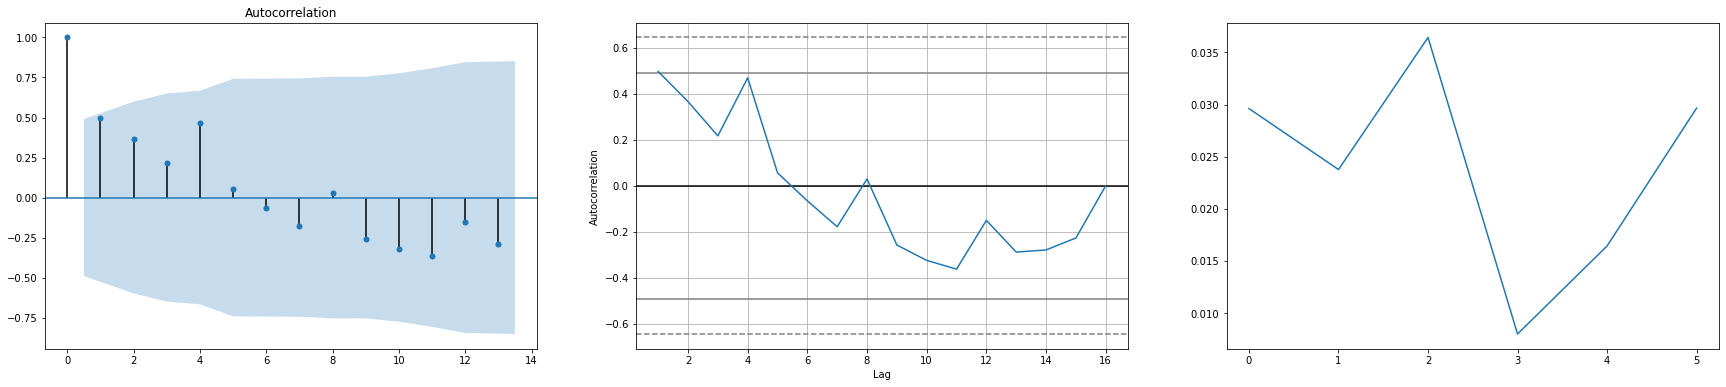

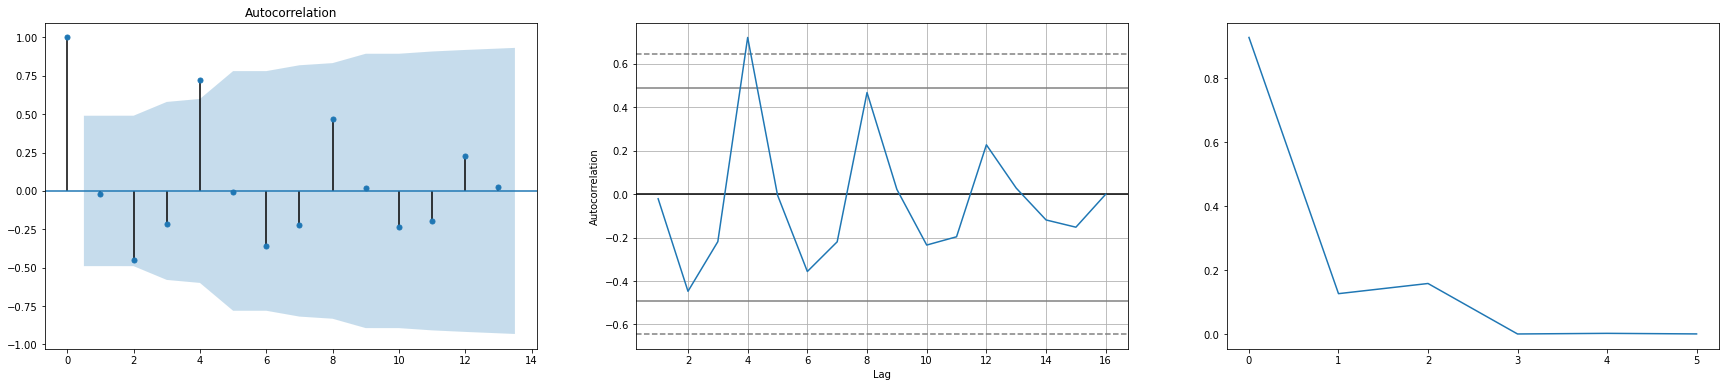

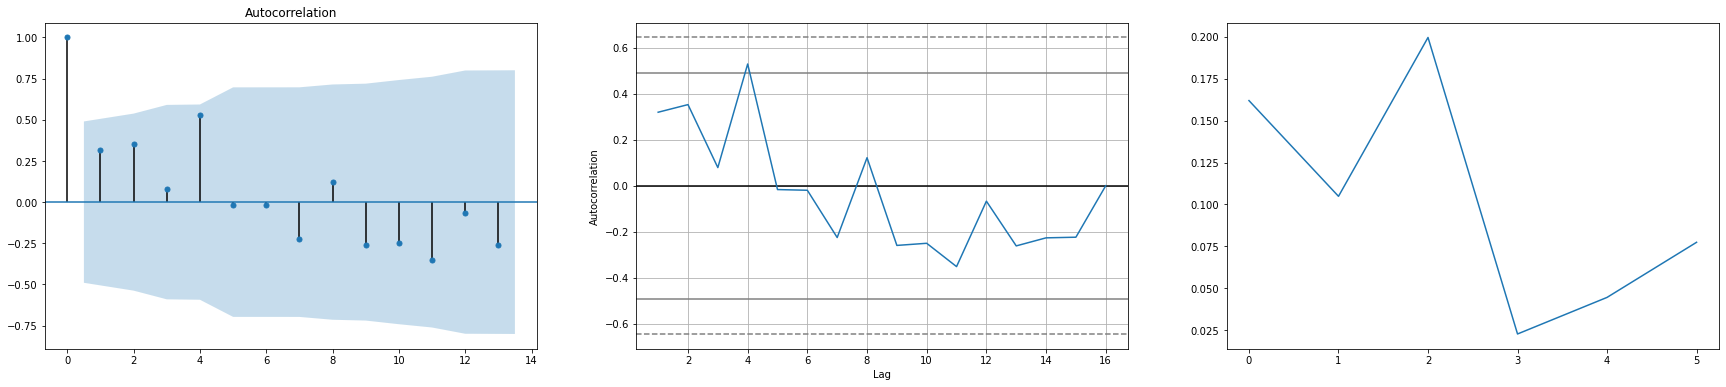

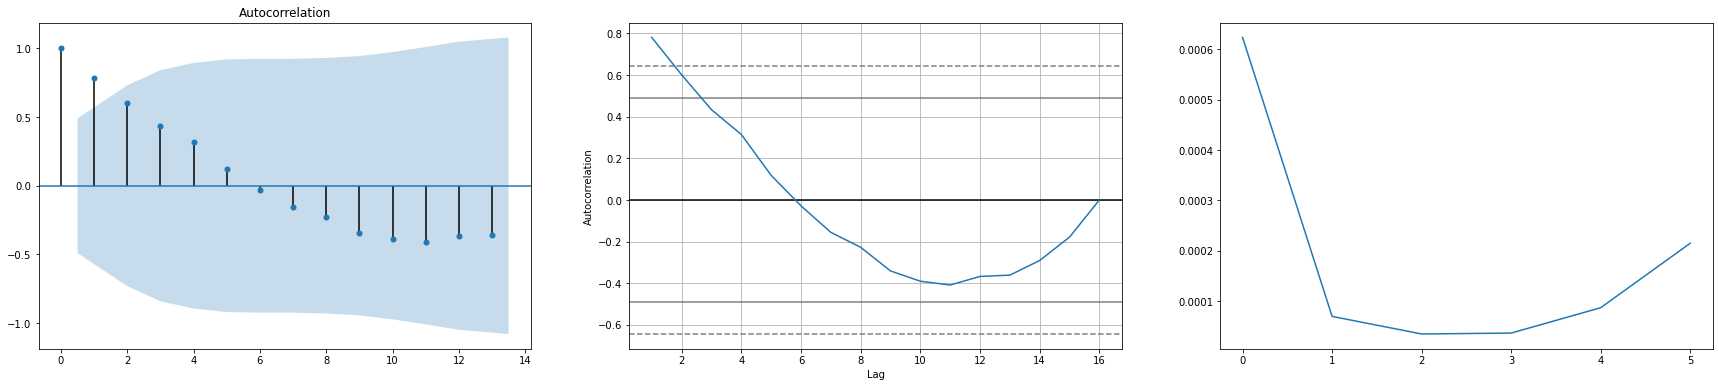

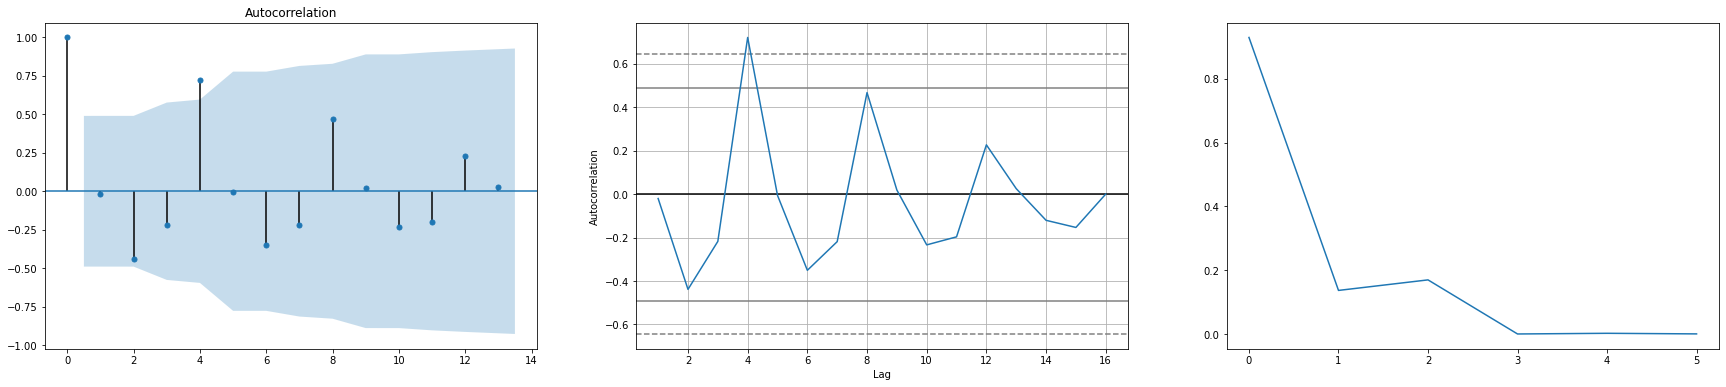

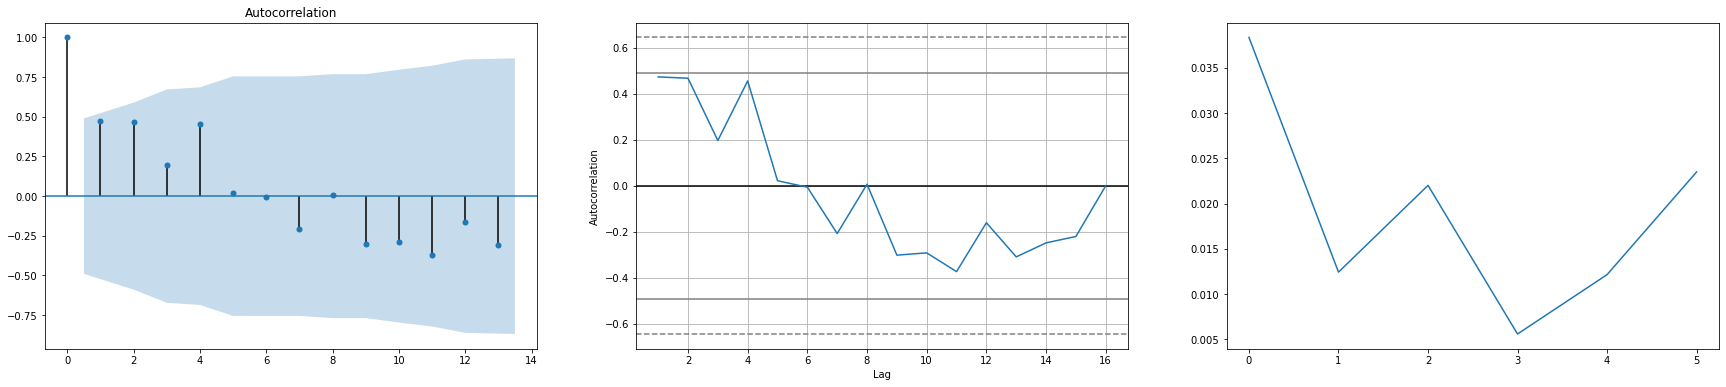

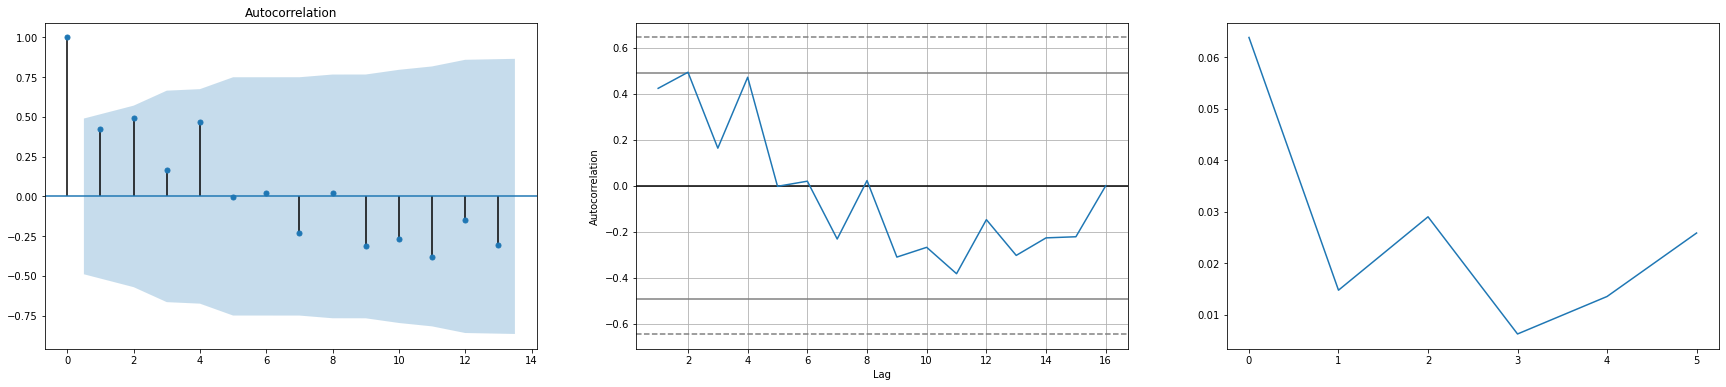

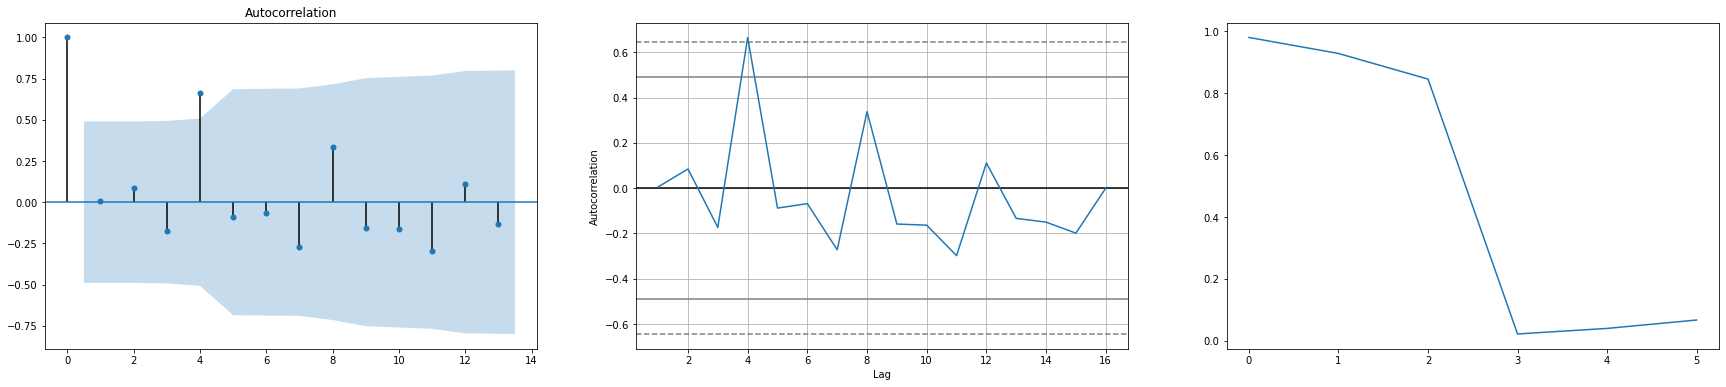

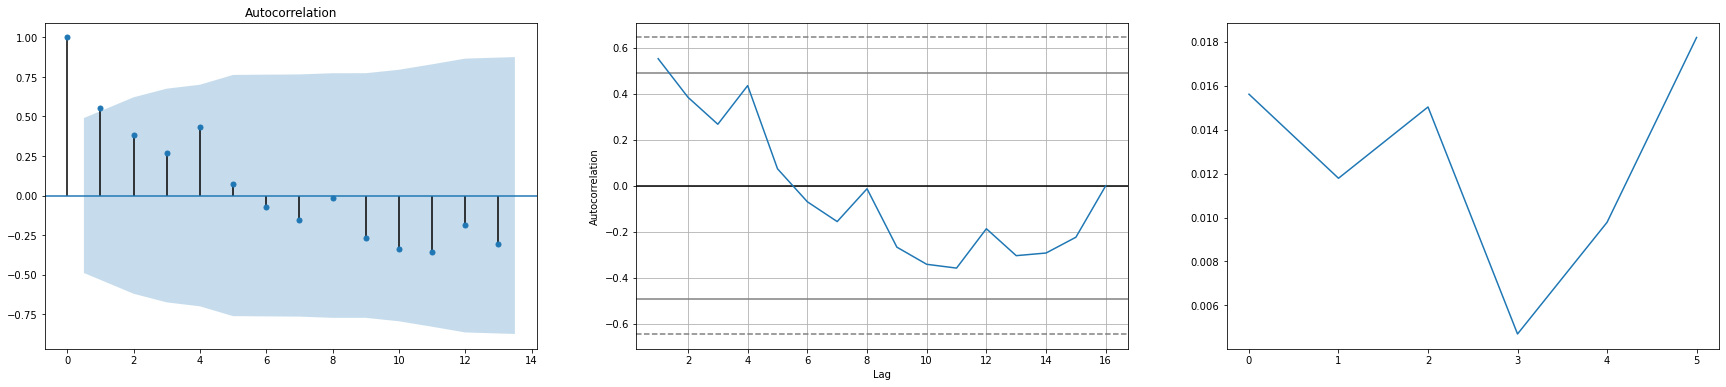

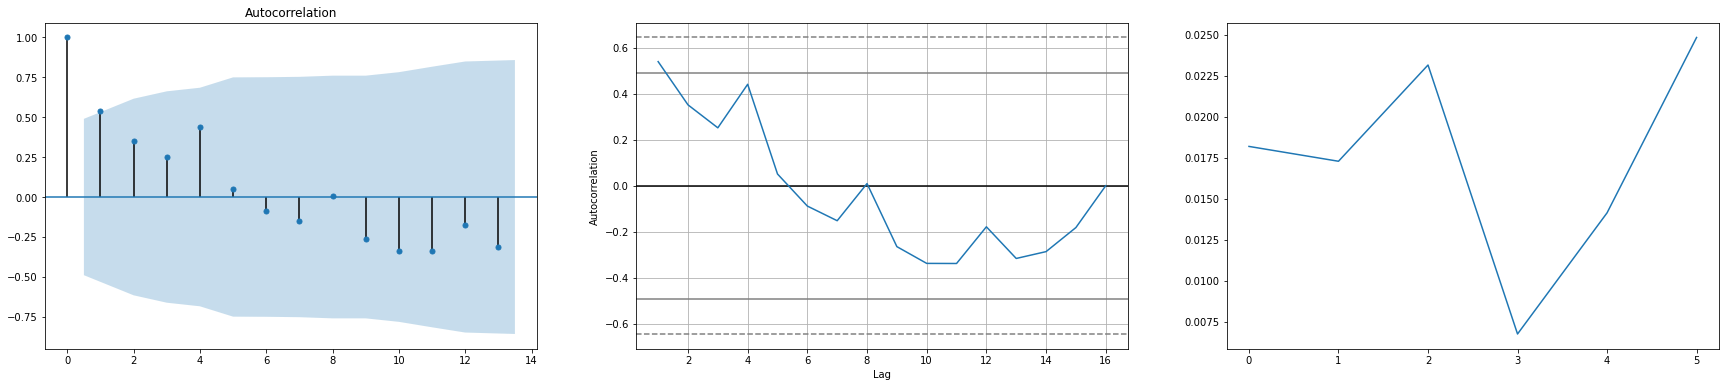

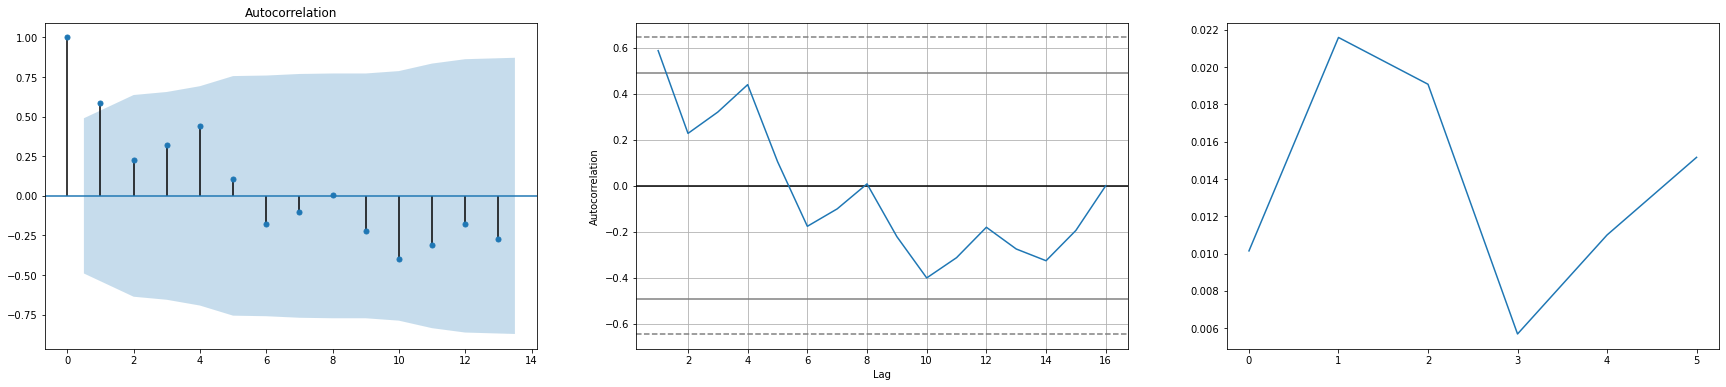

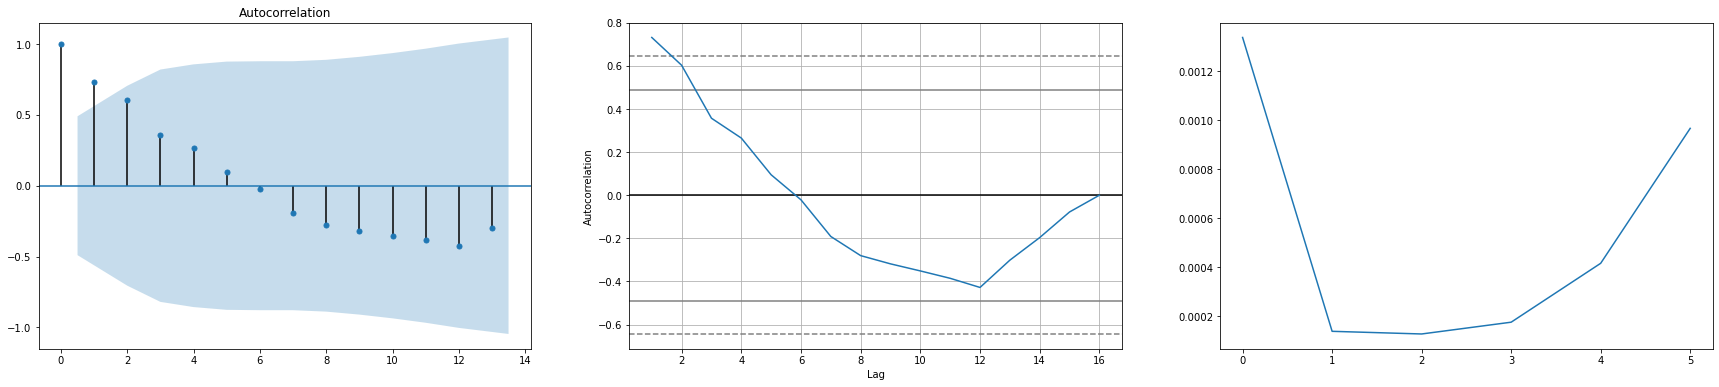

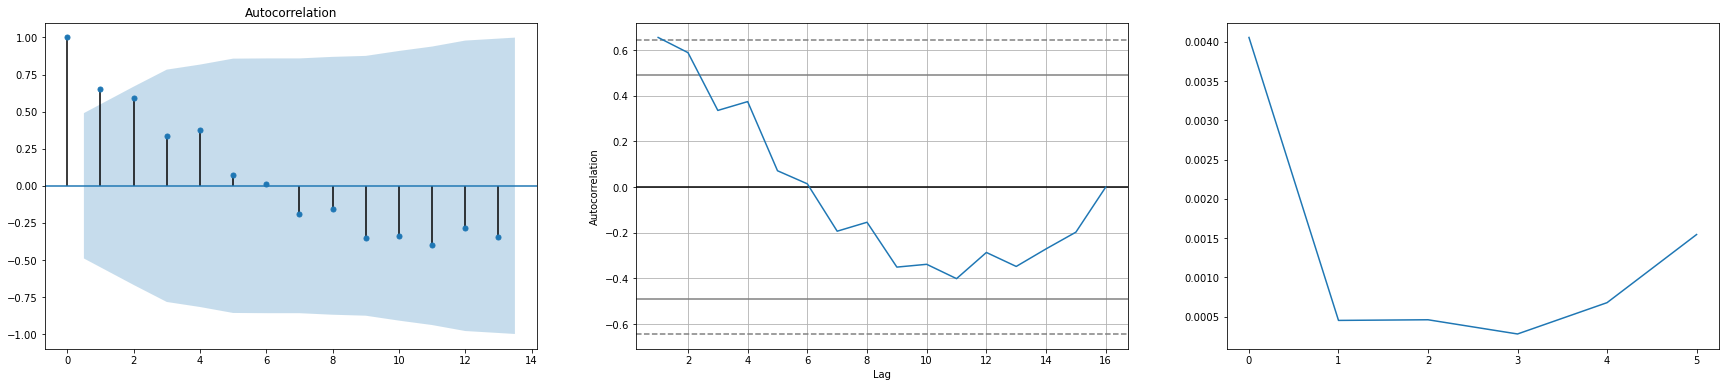

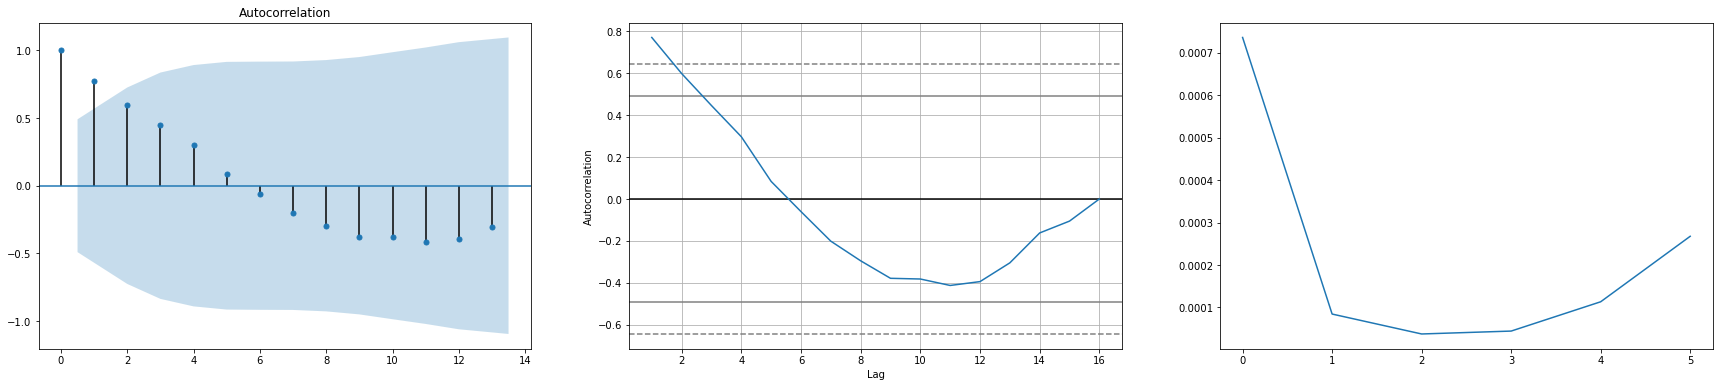

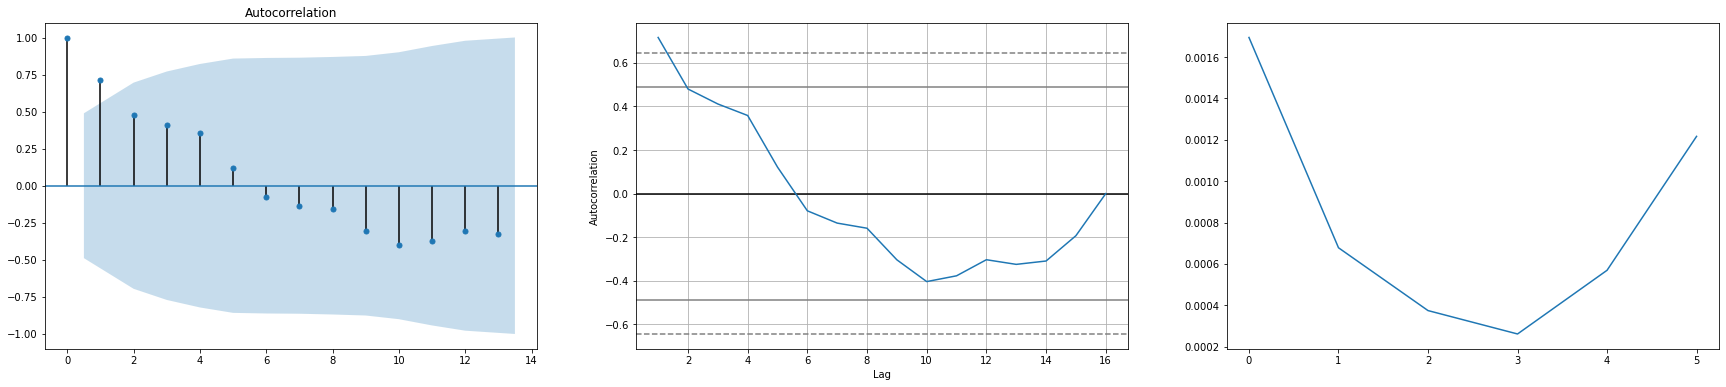

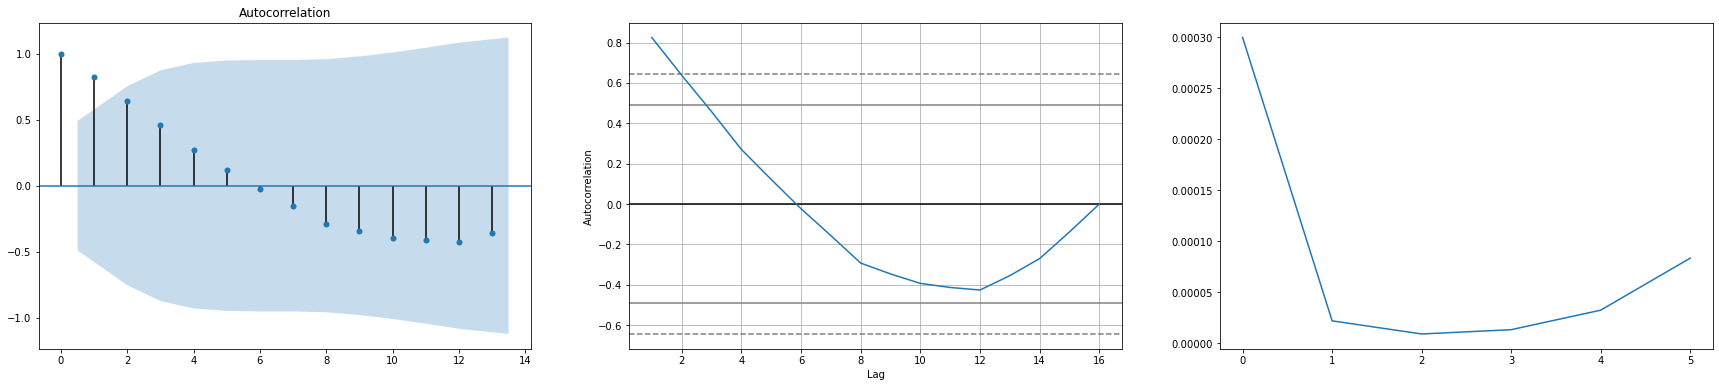

In [65]:
GDP_type = ['国内生产总值', '第一产业增加值', '第二产业增加值', '第三产业增加值', 
            '农林牧渔业增加值', '工业增加值', '制造业增加值', '建筑业增加值', '批发和零售业增加值',
            '交通运输、仓储和邮政业增加值', '住宿和餐饮业增加值', '金融业增加值', 
            '房地产业增加值', '信息传输、软件和信息技术服务业增加值', '租赁和商务服务业增加值', '其他行业增加值']

for i in GDP_type:
    each_data = data_economy[i][:-2]
    plt.figure(figsize=(30,6))
    ax1 = plt.subplot(1,3,1)
    ax2 = plt.subplot(1,3,2)
    ax3 = plt.subplot(1,3,3)
    
    LB2,P2 = acorr_ljungbox(each_data)  # 纯随机性检验
    plot_acf(each_data,ax= ax1)
    
    autocorrelation_plot(each_data,ax= ax2) # 进行平稳性检验
    ax3.plot(P2)

- 对于 16 个行业的时间序列进行平稳性检验和纯随机性检验，通过图片可以看出对于大部分的数据列来讲，都是能通过平稳性检验和纯随机性检验，
- 只有部分几个数据集上纯随机性检验 P 值大于 0.05
- 不过总体还都符合要求，对于几个异常值不再考虑，仅选择几个有价值的数据进行时序建模

In [81]:
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import arma_order_select_ic

warnings.filterwarnings('ignore')
data_amra = pd.DataFrame(data_economy['国内生产总值'][:-2]) # 选取疫情期前的16个季度进行建模

a,b = arma_order_select_ic(data_amra,ic='hqic')['hqic_min_order']
arma = ARMA(data_amra, order = (a,b)).fit()  # 使用ARMA建模

# 获得疫情期当季度的预测值 arma.forecast(steps=1)[0]
# print(arma.forecast(steps=1))
rate1 = list(data_economy['国内生产总值'][-2]  /  arma.forecast(steps=1)[0]) 
rate1

(array([249603.08050572]), array([17164.98589661]), array([[215960.32635323, 283245.8346582 ]]))


[0.8273307347874228]

In [85]:
from pyecharts import options as opts
from pyecharts.charts import Liquid
c = (
    Liquid()
    .add("实际值/预测值", rate1, is_outline_show = False)
    .set_global_opts(title_opts = opts.TitleOpts(
        title="第一季度国民生产总值实际值与预测值比例", 
        pos_left="center"
    ))
)
c.load_javascript()

In [86]:
c.render_notebook()

In [77]:
data_economy['国内生产总值'][-2]

206504.3

- 如果不受疫情影响，2020 第一季度的 GDP 应该会高出很多，第一季度的实际 GDP 仅有预测 GDP 值的 83%

In [87]:
warnings.filterwarnings('ignore')
data_amra = pd.DataFrame(data_economy['工业增加值'][:-2]) # 选取疫情期前的16个季度进行建模

a,b = arma_order_select_ic(data_amra,ic='hqic')['hqic_min_order']
arma = ARMA(data_amra, order = (a,b)).fit()  # 使用ARMA建模

# 获得疫情期当季度的预测值 arma.forecast(steps=1)[0]
# print(arma.forecast(steps=1))
rate2 = list(data_economy['工业增加值'][-2]  /  arma.forecast(steps=1)[0]) 
rate2



c = (
    Liquid()
    .add("实际值/预测值", rate2, is_outline_show = False)
    .set_global_opts(title_opts = opts.TitleOpts(
        title="第一季度工业增加值实际值与预测值比例", 
        pos_left="center"
    ))
)
c.load_javascript()

In [88]:
c.render_notebook()

In [89]:
warnings.filterwarnings('ignore')
data_amra = pd.DataFrame(data_economy['制造业增加值'][:-2]) # 选取疫情期前的16个季度进行建模

a,b = arma_order_select_ic(data_amra,ic='hqic')['hqic_min_order']
arma = ARMA(data_amra, order = (a,b)).fit()  # 使用ARMA建模

# 获得疫情期当季度的预测值 arma.forecast(steps=1)[0]
# print(arma.forecast(steps=1))
rate3 = list(data_economy['制造业增加值'][-2]  /  arma.forecast(steps=1)[0]) 
rate3



c = (
    Liquid()
    .add("实际值/预测值", rate3, is_outline_show = False)
    .set_global_opts(title_opts = opts.TitleOpts(
        title="第一季度制造业增加值实际值与预测值比例", 
        pos_left="center"
    ))
)
c.load_javascript()

In [90]:
c.render_notebook()

In [91]:
warnings.filterwarnings('ignore')
data_amra = pd.DataFrame(data_economy['批发和零售业增加值'][:-2]) # 选取疫情期前的16个季度进行建模

a,b = arma_order_select_ic(data_amra,ic='hqic')['hqic_min_order']
arma = ARMA(data_amra, order = (a,b)).fit()  # 使用ARMA建模

# 获得疫情期当季度的预测值 arma.forecast(steps=1)[0]
# print(arma.forecast(steps=1))
rate2 = list(data_economy['批发和零售业增加值'][-2]  /  arma.forecast(steps=1)[0]) 
rate2



c = (
    Liquid()
    .add("实际值/预测值", rate2, is_outline_show = False)
    .set_global_opts(title_opts = opts.TitleOpts(
        title="第一季度批发和零售业增加值实际值与预测值比例", 
        pos_left="center"
    ))
)
c.load_javascript()

In [92]:
c.render_notebook()

In [93]:
warnings.filterwarnings('ignore')
data_amra = pd.DataFrame(data_economy['金融业增加值'][:-2]) # 选取疫情期前的16个季度进行建模

a,b = arma_order_select_ic(data_amra,ic='hqic')['hqic_min_order']
arma = ARMA(data_amra, order = (a,b)).fit()  # 使用ARMA建模

# 获得疫情期当季度的预测值 arma.forecast(steps=1)[0]
# print(arma.forecast(steps=1))
rate2 = list(data_economy['金融业增加值'][-2]  /  arma.forecast(steps=1)[0]) 
rate2



c = (
    Liquid()
    .add("实际值/预测值", rate2, is_outline_show = False)
    .set_global_opts(title_opts = opts.TitleOpts(
        title="第一季度金融业增加值实际值与预测值比例", 
        pos_left="center"
    ))
)
c.load_javascript()

In [94]:
c.render_notebook()

In [95]:
warnings.filterwarnings('ignore')
data_amra = pd.DataFrame(data_economy['信息传输、软件和信息技术服务业增加值'][:-2]) # 选取疫情期前的16个季度进行建模

a,b = arma_order_select_ic(data_amra,ic='hqic')['hqic_min_order']
arma = ARMA(data_amra, order = (a,b)).fit()  # 使用ARMA建模

# 获得疫情期当季度的预测值 arma.forecast(steps=1)[0]
# print(arma.forecast(steps=1))
rate2 = list(data_economy['信息传输、软件和信息技术服务业增加值'][-2]  /  arma.forecast(steps=1)[0]) 
rate2



c = (
    Liquid()
    .add("实际值/预测值", rate2, is_outline_show = False)
    .set_global_opts(title_opts = opts.TitleOpts(
        title="信息传输、软件和信息技术服务业增加值 实际值与预测值比例", 
        pos_left="center"
    ))
)
c.load_javascript()

In [96]:
c.render_notebook()